### 1. Imports

In [1]:
# ================= IMPORTS =================

# standard
from pathlib import Path

# UI / plotting
%matplotlib widget

# project
from segmentation_utils.state import ImageState
from segmentation_utils.crop_ui import CropUI
from segmentation_utils.sam_ui import SamUI


#### SAM SETUP

In [ ]:
# ================= SAM SETUP =================
# NOTE:
# You must download Segment Anything (SAM) separately.
# See: https://github.com/facebookresearch/segment-anything
#
# 1. Clone the repo
# 2. Download a SAM checkpoint (e.g. sam_vit_h_4b8939.pth)
# 3. Set SAM_ROOT and SAM_CKPT below

import sys

SAM_ROOT = Path("/absolute/path/to/segment-anything")   # <-- CHANGE THIS TO YOUR SAM PATH
SAM_CKPT = SAM_ROOT / "sam_vit_h_4b8939.pth"             # <-- CHANGE IF NEEDED

assert SAM_ROOT.exists(), "SAM_ROOT does not exist"
assert SAM_CKPT.exists(), "SAM checkpoint not found"

sys.path.append(str(SAM_ROOT))

from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry["default"](str(SAM_CKPT)).cuda()
sam_predictor = SamPredictor(sam)

print("SAM loaded successfully")


### 2. Data loading

In [6]:
# ================= CONFIG =================

from pathlib import Path

# Local project data folder
root = Path.cwd() / "data" # load your own path for your images

# Available monuments
monuments = ["Akbar", "Bibi", "Charminar", "Itimad", "Taj"]

# Select monument and view
monument = monuments[4]   # change index to choose a different monument
view = "front" # or drone

image_name = f"{monument}_{view}.jpg"
image_path = root / monument / "images" / image_name

assert image_path.exists(), f"Image not found: {image_path}"


### 3. Interactive symmetry-aware crop

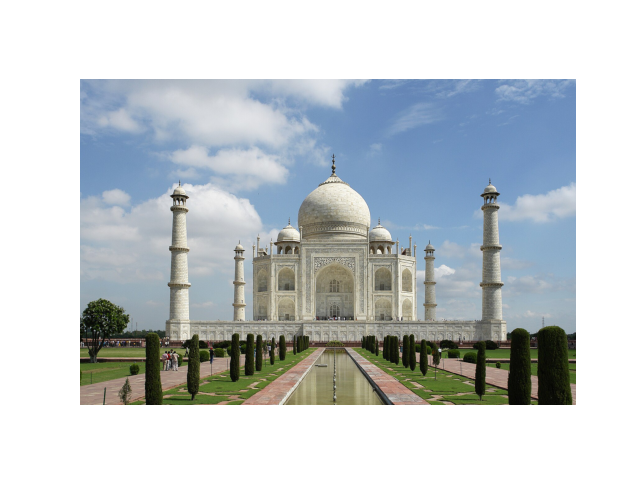

In [8]:
# ================= CROP =================

state = ImageState()

crop_ui = CropUI(
    state=state,
    save_dir=Path.cwd() / "data_temp"
)

crop_ui.load(image_path)


### 4. Interactive part segmentation using SAM

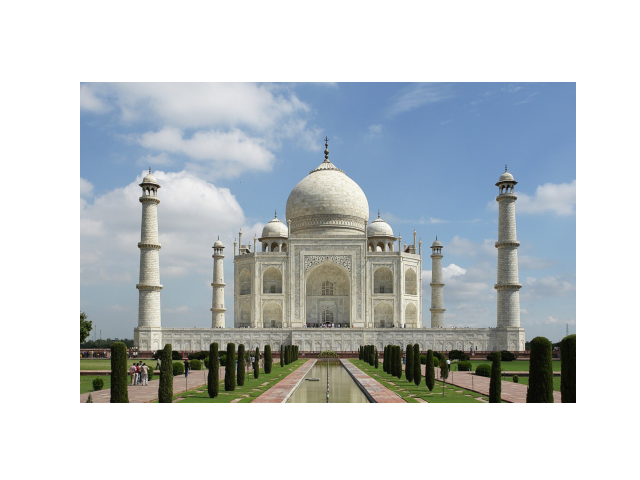

In [9]:
# ================= SEGMENTATION =================

from segmentation_utils.sam_ui import SamUI

sam_ui = SamUI(
    state=state,
    sam_predictor=sam_predictor
)

sam_ui.launch()


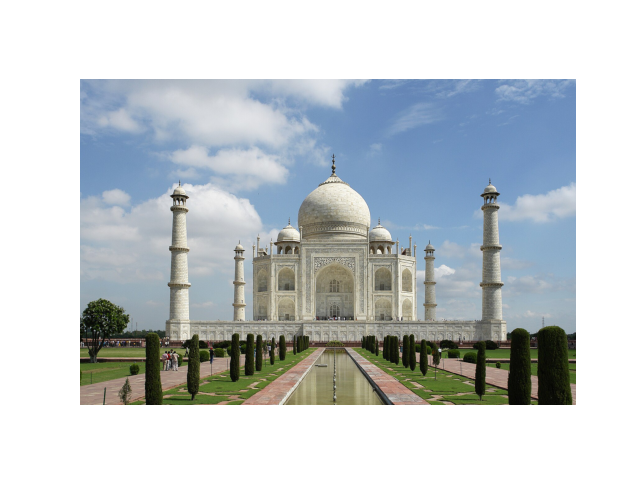

In [11]:
%matplotlib widget

from pathlib import Path
import importlib

import segmentation_utils.crop_ops as crop_ops
import segmentation_utils.state as state_mod
import segmentation_utils.crop_ui as crop_ui_mod

importlib.reload(crop_ops)
importlib.reload(state_mod)
importlib.reload(crop_ui_mod)

from segmentation_utils.state import ImageState
from segmentation_utils.crop_ui import CropUI

# ---------------- CONFIG ----------------
root = Path.cwd() / "data"

monuments = ["Akbar","Bibi","Charminar","Itimad","Taj"]
monument = monuments[4]
view = "front"

image_name = f"{monument}_{view}.jpg"
image_path = root / monument / "images" / image_name
assert image_path.exists()

# ---------------- CROP UI ----------------
state = ImageState()

crop_ui = CropUI(
    state=state,
    save_dir=Path.cwd() / "data_temp"
)

crop_ui.load(image_path)


Config + SAM loaded


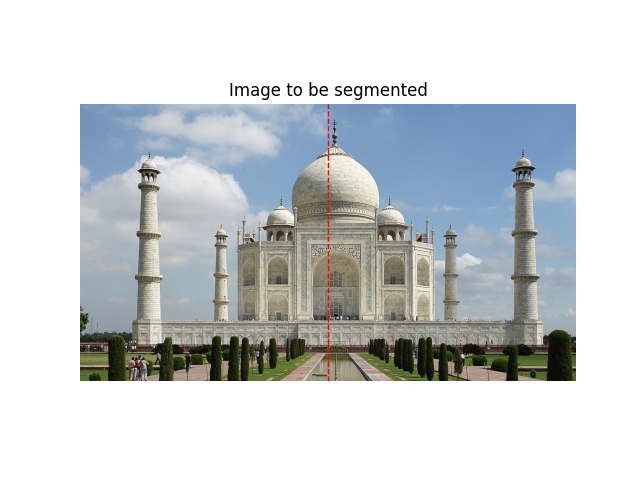

Image shape: (741, 1328, 3)


In [21]:
import matplotlib.pyplot as plt

img = state.curr_np
assert img is not None, "No cropped image found"

plt.imshow(img)
plt.axis("off")
plt.title("Image to be segmented")
plt.show()

print("Image shape:", img.shape)


### Segmentation

In [18]:
import importlib
import segmentation_utils.sam_ui as sam_ui_mod
importlib.reload(sam_ui_mod)

from segmentation_utils.sam_ui import SamUI


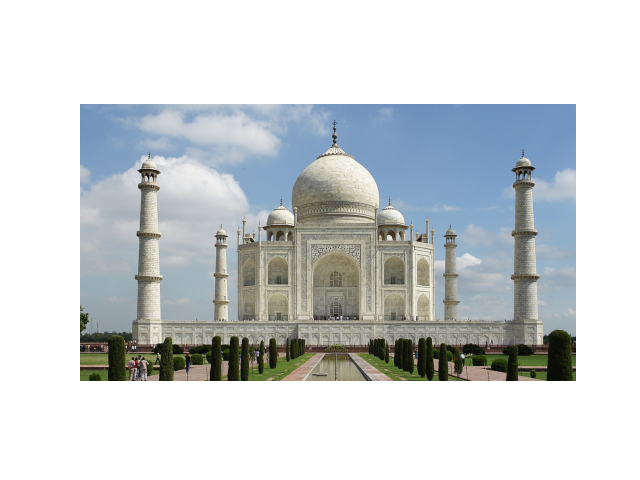

In [22]:
sam_ui = SamUI(
    state=state,
    sam_predictor=sam_predictor
)

sam_ui.launch()


### Imports

In [1]:
import sys
from pathlib import Path
import numpy as np
import cv2
import ipywidgets as W
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

### Install Segment Anything

In [2]:

# ---------------- SAM setup (local, temporary) ----------------
# NOTE: hard-coded path for now; readers are not required to install SAM yet
SAM_ROOT = Path("/home/sanju/mycode/Image_segmentation/sam")
SAM_CKPT = SAM_ROOT / "sam_vit_h_4b8939.pth"

sys.path.append(str(SAM_ROOT))

from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry["default"](str(SAM_CKPT)).cuda()
sam_predictor = SamPredictor(sam)

print("Config + SAM loaded")

Config + SAM loaded


### Load data

In [3]:
# ================== Interactive SAM (ipywidgets + Matplotlib) ==================
# Requirements (later): pip install ipympl
%matplotlib widget

# ---------------- CONFIG (canonical) ----------------
# Single source of truth for colors / parts
from utils.config import (
    PART_COLORS,
    PART_COLORS_NP,
    INTERIOR_PARTS,
)

# data root consistent with other notebooks
ROOT = Path.cwd() / "data"
EXTS = {".jpg", ".jpeg", ".png"}
TARGET_CANVAS_W = 900


print("Data root:", ROOT)
print("Parts:", list(PART_COLORS.keys()))


Data root: /home/sanju/mycode/Part-based-3D-Reconstruction/data
Parts: ['full_building', 'chhatris', 'plinth', 'dome', 'front_minarets', 'back_minarets', 'small_minarets', 'main_door', 'windows', 'background']


### Interactive segmentation

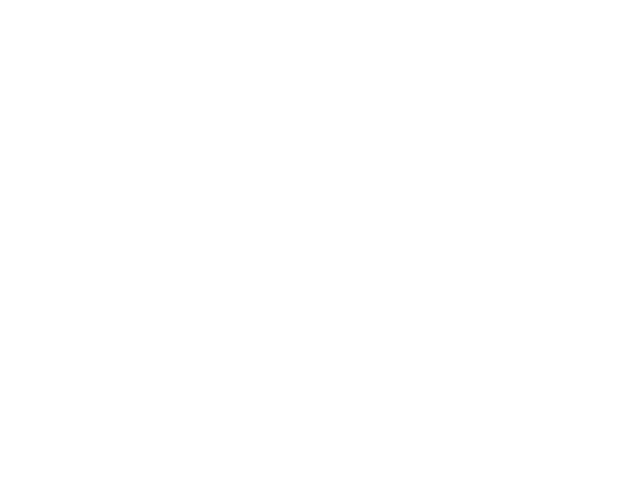

In [5]:
%matplotlib widget

from segmentation_utils.interactive_part_segmentation import launch_ui

launch_ui(
    ROOT=ROOT,
    EXTS=EXTS,
    TARGET_CANVAS_W=TARGET_CANVAS_W,
    LABEL_PARTS=PART_COLORS,
    sam_predictor=sam_predictor,   
)
